In [23]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
dt = datetime( 2022,12,1,11,12)
dt

datetime.datetime(2022, 12, 1, 11, 12)

In [4]:
print( dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)

2022 12 1 11 12 0


https://docs.python.org/ko/3/library/datetime.html

In [6]:
dt.strftime( '%Y-%m-%d %a' )

'2022-12-01 Thu'

In [7]:
cur = datetime.now()
cur

datetime.datetime(2022, 12, 12, 10, 25, 22, 198403)

### 시계열데이터정의
1. 인덱스가 datetime 형
2. 시계열데이터의 indexing, slicing을 사용, resample함수 사용가능

In [12]:
data = [[1,2],[3,4],[5,8],[7,6],[9,12],[11,10],[13,16],[15,20]]
df = pd.DataFrame( data )
# df.index = ['2022-01-01','2022-02-01','2022-03-01','2022-04-01',
#             '2022-05-01','2022-06-01','2022-07-01','2022-08-01']
# df.index = [datetime(2022,1,1),datetime(2022,2,1),datetime(2022,3,1),datetime(2022,4,1),
#         datetime(2022,5,1),datetime(2022,6,1),datetime(2022,7,1),datetime(2022,8,1)]
df

,0,1
2022-01-01,1,2
2022-02-01,3,4
2022-03-01,5,8
2022-04-01,7,6
2022-05-01,9,12
2022-06-01,11,10
2022-07-01,13,16
2022-08-01,15,20


In [14]:
df.index

DatetimeIndex(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01'],
              dtype='datetime64[ns]', freq=None)

1. 년-월-일 시:분:초
2. 년.월.일
3. 년/월/일

In [15]:
df.index = ['2022년01월01일','2022년02월01일','2022년03월01일','2022년04월01일',
            '2022년05월01일','2022년06월01일','2022년07월01일','2022년08월01일']

In [17]:
df.index = pd.to_datetime( df.index,format='%Y년%m월%d일' )

In [18]:
df

,0,1
2022-01-01,1,2
2022-02-01,3,4
2022-03-01,5,8
2022-04-01,7,6
2022-05-01,9,12
2022-06-01,11,10
2022-07-01,13,16
2022-08-01,15,20


### 이동평균: 시계열데이터의 추세

In [21]:
df.rolling( window=2 ).mean()

,0,1
2022-01-01,NaN,NaN
2022-02-01,2.0,3.0
2022-03-01,4.0,6.0
2022-04-01,6.0,7.0
2022-05-01,8.0,9.0
2022-06-01,10.0,11.0
2022-07-01,12.0,13.0
2022-08-01,14.0,18.0


In [22]:
df.rolling( window=3 ).mean()

,0,1
2022-01-01,NaN,NaN
2022-02-01,NaN,NaN
2022-03-01,3.0,4.666667
2022-04-01,5.0,6.000000
2022-05-01,7.0,8.666667
2022-06-01,9.0,9.333333
2022-07-01,11.0,12.666667
2022-08-01,13.0,15.333333


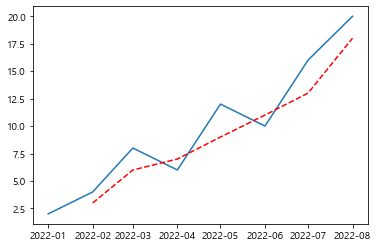

In [26]:
plt.plot( df.index, df[1] )
plt.plot( df.index, df.rolling(window=2).mean()[1], 'r--' )
plt.show()

In [28]:
!pip install finance-datareader

In [29]:
import FinanceDataReader as fdr

In [30]:
df = fdr.DataReader('005930', '2017-01-01')
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998
2017-01-09,36600,37500,36560,37220,263898,0.028177
2017-01-10,37280,37400,37080,37240,181996,0.000537
2017-01-11,37520,38560,37420,38280,240363,0.027927
2017-01-12,38000,38800,37980,38800,233383,0.013584


In [31]:
df.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2022-11-29', '2022-11-30', '2022-12-01', '2022-12-02',
               '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
               '2022-12-09', '2022-12-12'],
              dtype='datetime64[ns]', name='Date', length=1462, freq=None)

In [32]:
df.rolling(window=20).mean()['Close']

Date
2017-01-02        NaN
2017-01-03        NaN
2017-01-04        NaN
2017-01-05        NaN
2017-01-06        NaN
               ...   
2022-12-06    61315.0
2022-12-07    61160.0
2022-12-08    61100.0
2022-12-09    60975.0
2022-12-12    60855.0
Name: Close, Length: 1462, dtype: float64

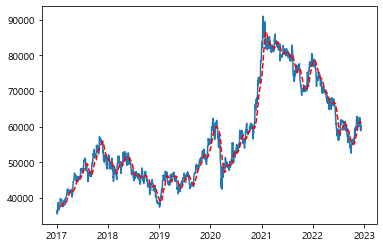

In [34]:
plt.plot( df.index, df['Close'])
plt.plot( df.index, df.rolling(window=20).mean()['Close'], 'r--')
plt.show()

### 시계열데이터 인덱싱, 슬라이싱

In [36]:
df.loc['2017']

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998
...,...,...,...,...,...,...
2017-12-21,51000,51060,49100,49140,312486,-0.034198
2017-12-22,49400,49960,49240,49700,223993,0.011396
2017-12-26,49760,50100,48200,48200,320797,-0.030181


In [37]:
df.loc['2017-07']

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-07-03,47500,47780,47120,47220,136111,-0.006731
2017-07-04,47160,47400,46900,47000,159220,-0.004659
2017-07-05,46820,47680,46780,47580,212805,0.012340
2017-07-06,48000,48100,47720,48060,218461,0.010088
2017-07-07,47740,48120,47620,47860,162638,-0.004161
2017-07-10,48500,48900,48320,48660,215855,0.016715
2017-07-11,48640,49000,48280,49000,194356,0.006987
2017-07-12,49000,50000,48840,49880,189723,0.017959
2017-07-13,50080,50940,50040,50560,320683,0.013633


In [38]:
df.loc['2017':'2019']

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998
...,...,...,...,...,...,...
2019-12-23,56100,56400,55100,55500,9839252,-0.008929
2019-12-24,55600,55700,54800,55000,11868463,-0.009009
2019-12-26,54700,55400,54400,55400,9645034,0.007273


In [40]:
df.loc['2017-01':'2018-07']

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998
...,...,...,...,...,...,...
2018-07-25,46250,46550,45900,46150,7222471,0.000000
2018-07-26,46100,47000,46000,46900,7374946,0.016251
2018-07-27,46450,47000,46450,46900,4762460,0.000000


In [42]:
df['year'] = df.index.year

In [43]:
df

,Open,High,Low,Close,Volume,Change,year
Date,,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665,2017
2017-01-03,36280,36620,36020,36480,147153,0.010526,2017
2017-01-04,36500,36520,36100,36160,159435,-0.008772,2017
2017-01-05,36060,36060,35540,35560,219349,-0.016593,2017
2017-01-06,36180,36440,36040,36200,177619,0.017998,2017
...,...,...,...,...,...,...,...
2022-12-06,59800,60100,59200,59200,13888300,-0.018242,2022
2022-12-07,58800,59600,58500,58900,12100662,-0.005068,2022
2022-12-08,58700,59200,58600,59200,12986815,0.005093,2022
